In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir('C:\\Users\\Administrator\\Desktop\\ml_ipynb\\ex6')
	print(os.getcwd())
except:
    print(os.getcwd()+" not changed!!!")



C:\Users\Administrator\Desktop\ml_ipynb\ex6


 # ex6 尝试高斯内核函数

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize as opt
import sys
from sklearn import svm
import scipy.io as sio
import seaborn as sns
sys.path.append('..')
sys.path
from helper import formulas




 # 1 首先加载数据

In [3]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')
data.head()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


 看看一共有多少数据

In [4]:
data.shape


(863, 3)

 # 2 展示数据
 可以很明显的看出来,这是一个非线性的

D:\programSoftware\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


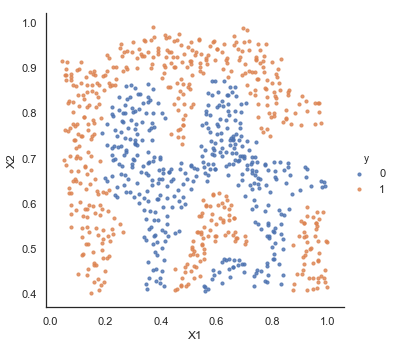

In [5]:
sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', hue='y', data=data, 
           size=5, 
           fit_reg=False, 
           scatter_kws={"s": 10}
          )




 # 3 首先使用内置的高斯核函数

In [6]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])



0.9698725376593279

 the predict_proba will give you ndarray (data size, class)
 so if you just want to plot the decision contour of this binary example, choose one class and plot it

In [8]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])[:, 0]


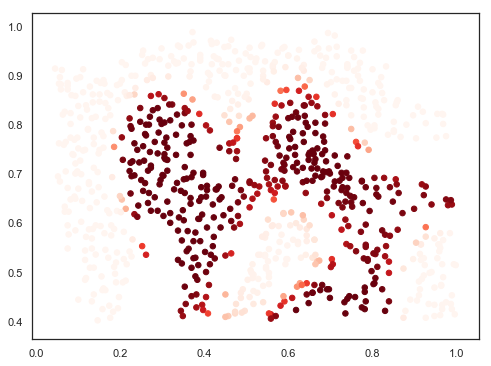

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_prob, cmap='Reds')
